## 아파트 투자매력도 분석

## 라이브러리 생성

In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import lightgbm
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv('result1.csv')
data

,아파트명,아파트주소,동,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,매매일반평균가격,Y,male_0,...,Flow_60_F,Flow_70_F,Flow_00_M,Flow_10_M,Flow_20_M,Flow_30_M,Flow_40_M,Flow_50_M,Flow_60_M,Flow_70_M
0,창신쌍용2,서울특별시 종로구 낙산길 198,창신제3동,156,7,54.70,410000000,412500000,0,214,...,27388,12406,580,9371,44055,55396,51880,56397,40368,15657
1,창신쌍용2,서울특별시 종로구 낙산길 198,창신제3동,156,7,54.70,410000000,412500000,0,214,...,27388,12406,580,9371,44055,55396,51880,56397,40368,15657
2,창신쌍용2,서울특별시 종로구 낙산길 198,창신제3동,156,7,54.70,410000000,412500000,0,214,...,27388,12406,580,9371,44055,55396,51880,56397,40368,15657
3,창신쌍용2,서울특별시 종로구 낙산길 198,창신제3동,156,7,54.70,410000000,412500000,0,214,...,27388,12406,580,9371,44055,55396,51880,56397,40368,15657
4,창신쌍용2,서울특별시 종로구 낙산길 198,창신제3동,156,7,54.70,410000000,412500000,0,214,...,27388,12406,580,9371,44055,55396,51880,56397,40368,15657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,아남3,서울특별시 종로구 혜화로3길 5,혜화동,10,1,94.86,600000000,815000000,0,342,...,135364,58926,2574,75569,485272,296331,262062,277611,175566,75498
1211,아남3,서울특별시 종로구 혜화로3길 5,혜화동,10,1,94.86,600000000,815000000,0,342,...,135364,58926,2574,75569,485272,296331,262062,277611,175566,75498
1212,아남3,서울특별시 종로구 혜화로3길 5,혜화동,10,1,94.86,600000000,815000000,0,342,...,135364,58926,2574,75569,485272,296331,262062,277611,175566,75498
1213,아남3,서울특별시 종로구 혜화로3길 5,혜화동,10,1,94.86,600000000,815000000,0,342,...,135364,58926,2574,75569,485272,296331,262062,277611,175566,75498


In [3]:
data.동=data.동.astype("category")

## 데이터 타입 변환 및 Param 설정

In [4]:
y=data.Y
x=data.drop('Y',axis=1)
x=x.drop('최근매매실거래가격',axis=1)
x=x.drop('매매일반평균가격',axis=1)
x=x.drop('아파트명',axis=1)
x=x.drop('아파트주소',axis=1)
x=x.drop('아파트동수',axis=1)

In [5]:
param = {'boosting_type': 'gbdt','num_leaves':10, 'objective':'binary','max_depth':10,'learning_rate':.05} 
#max_depth, learning rate높이면 과적화,but 변수가 너무 많으면 max_depth 증가(20~30)
param['metric'] = ['auc', 'binary'] #auc가 auccray가 아니라 auc 면적, 지금은 y값이 0,1이라 binary이지만 y값이 2이상이면 다항분포 사용
num_boost_round = 100
early_stopping_rounds = 30 #30번부터 차이가 없으면 30번 이후에서 끝내기
evals_result = {}
num_round = num_boost_round

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
train_data=lgb.Dataset(x_train,y_train) #label:lgb.dataset함수 내부에 y값 라벨링된 종속변수 의미
lgbm=lgb.train(param,train_data,num_round)
ypred=lgbm.predict(x_test)

#data1 lightGBM AUC
print("data AUC") #accuracy가 아니라 면적 auc
print(roc_auc_score(y_test,ypred))

[LightGBM] [Info] Number of positive: 563, number of negative: 287
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 850, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.662353 -> initscore=0.673797
[LightGBM] [Info] Start training from score 0.673797
data AUC
0.8851882160392799


In [7]:
ypred_result=ypred 
#F1 Score맞추기 위해서 하는 것, 모델 2개를 비교할땐 auc,
#여기의 auc는 다 영역임, but 0이 9개 ,1이 1개이면 전부 0이어도 정확성이 높게 나오므로 f1 score이 유의함 0,1 비율 5:5면 acuracy=f1score
for i in range(0,1):
    for j in range(0,len(ypred)):
        #0,1 맞추을 마주는 비율이 거의 같아지는 cut off 값을  찾아서 적용합니다.
        if ypred[j]>0.55:
            ypred_result[j]=1
        else:
            ypred_result[j]=0

pred_prob=pd.DataFrame(ypred)
pred_result=pd.DataFrame(ypred_result)

print("Crosstab")
print(pd.crosstab(ypred_result,y_test))

Crosstab
Y       0    1
row_0         
0.0    85   42
1.0    45  193


In [8]:
arr=pd.crosstab(y_test,ypred_result).to_numpy()
TN=arr[0][0]
TP=arr[1][1]
FN=arr[1][0]
FP=arr[0][1]
recall=TP/(TP+FN)
precision=TP/(TP+FP)
zero=TN/(TN+FP)
f1score=(precision*recall*2)/(precision+recall)

print("0,1 맞추는 비율 (1에 가까워야 0,1 모두 잘 맞추는 결과)")
print(recall/zero)
print("recall")     
print(recall)
print("precision")     
print(precision)

print("f1score")
print(f1score)

0,1 맞추는 비율 (1에 가까워야 0,1 모두 잘 맞추는 결과)
1.2560700876095119
recall
0.8212765957446808
precision
0.8109243697478992
f1score
0.8160676532769555


## 한글 폰트 설정

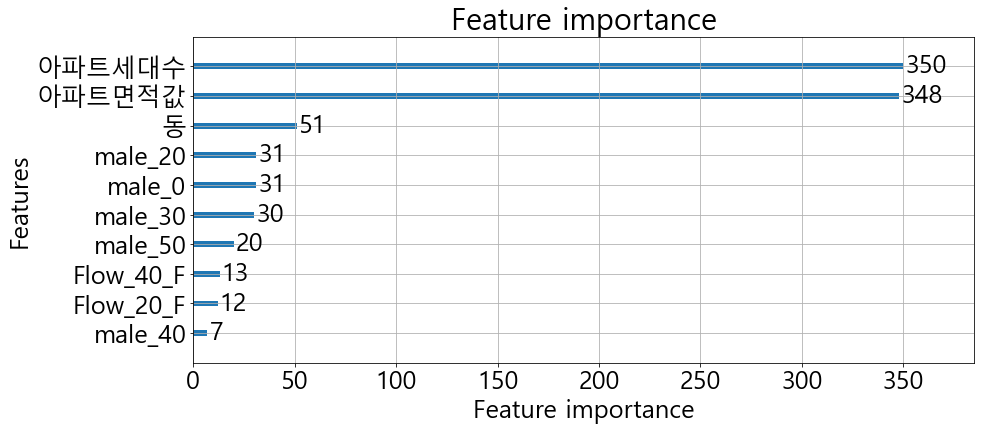

In [9]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Users/New20/OneDrive/Desktop/malgun.ttf").get_name()
rc('font', family=font_name)
#C:\Users\New20\OneDrive\Desktop\맑은고딕
plt.rcParams["figure.figsize"] = (14,6)
plt.rc('font',size=25)
ax = lgb.plot_importance(lgbm, max_num_features=10)
plt.show()

## 필요없는 값 dummy처리 / 범위에 따라 y값과의 상관계수 파악

In [10]:
data_dummy = pd.get_dummies(data['동'])

data_new=pd.merge(data,data_dummy,how="outer",left_index=True,right_index=True)

data_new=data_new.drop('동',axis=1)

data_new_Y=data_new.Y

data_new_apart=data_new.iloc[:,[2,4]]
data_new_apart=pd.merge(data_new_Y,data_new_apart,how="outer",left_index=True,right_index=True)

data_new_res=data_new.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
data_new_res=pd.merge(data_new_Y,data_new_res,how="outer",left_index=True,right_index=True)

data_new_flow=data_new.iloc[:,[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
data_new_flow=pd.merge(data_new_Y,data_new_flow,how="outer",left_index=True,right_index=True)

data_new_dong=data_new.iloc[:,[40,41,42,43,44,45,46,47,48]]
data_new_dong=pd.merge(data_new_Y,data_new_dong,how="outer",left_index=True,right_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


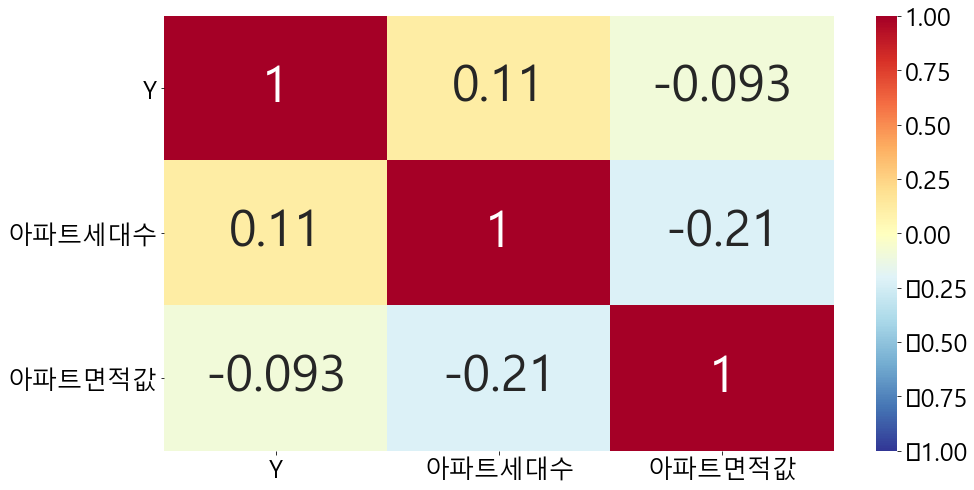

In [11]:
plt.figure(figsize=(15,8))
df = data_new_apart.corr()
sns.heatmap(df,annot = True,cmap = 'RdYlBu_r', vmin = -1, vmax = 1,annot_kws={"size": 50})

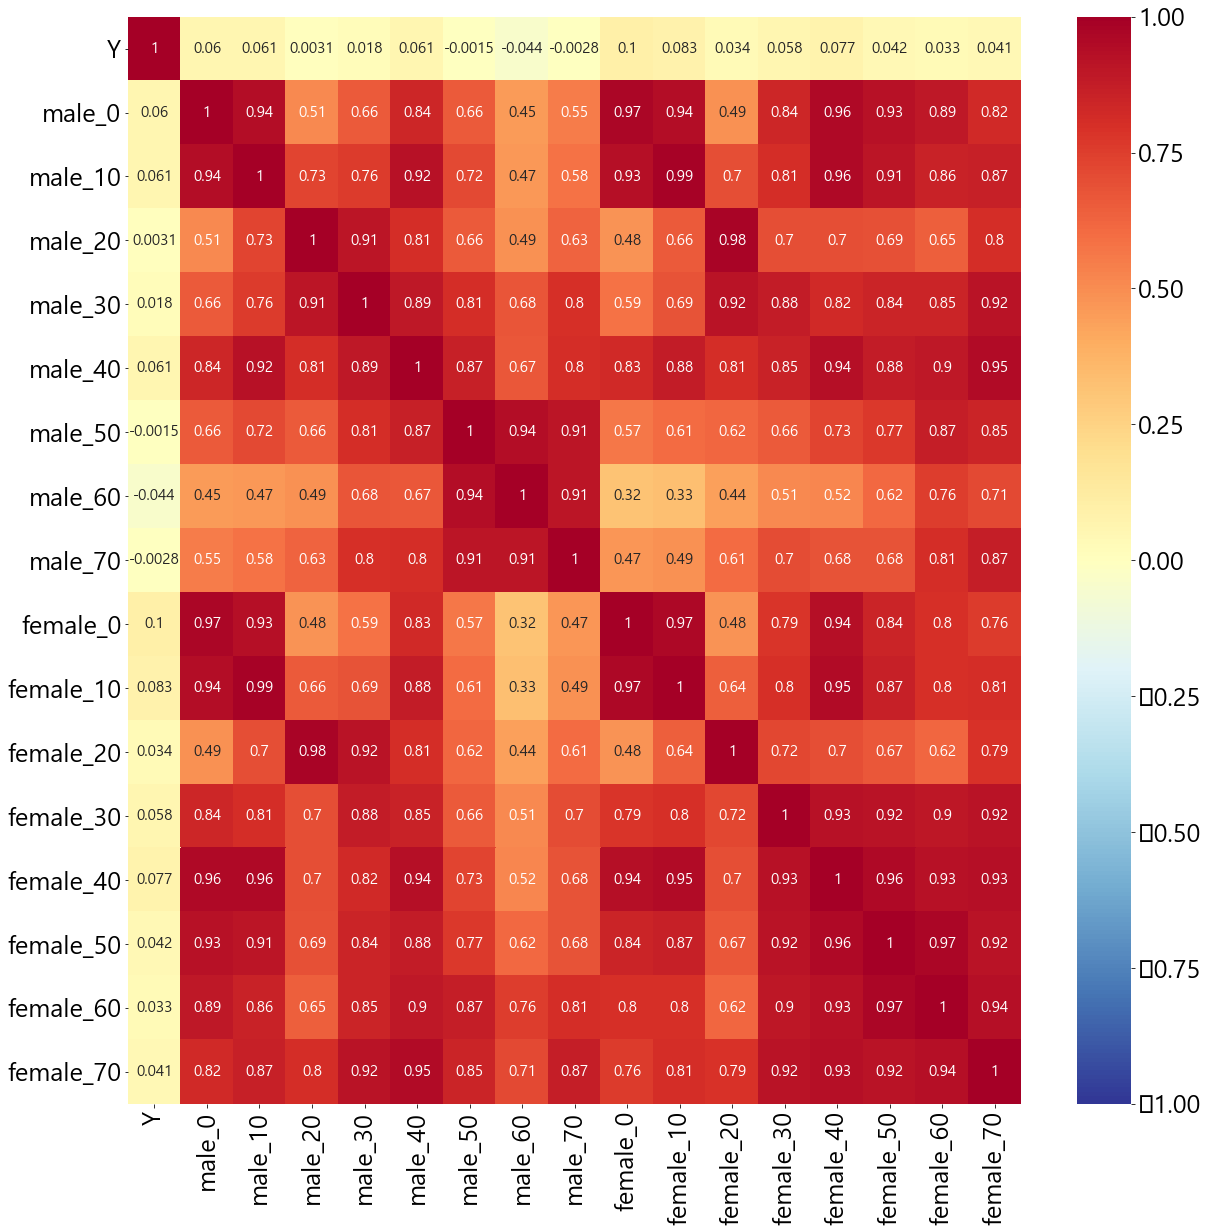

In [12]:
plt.figure(figsize=(20,20))
df = data_new_res.corr()
sns.heatmap(df,annot = True,cmap = 'RdYlBu_r', vmin = -1, vmax = 1,annot_kws={"size": 15})

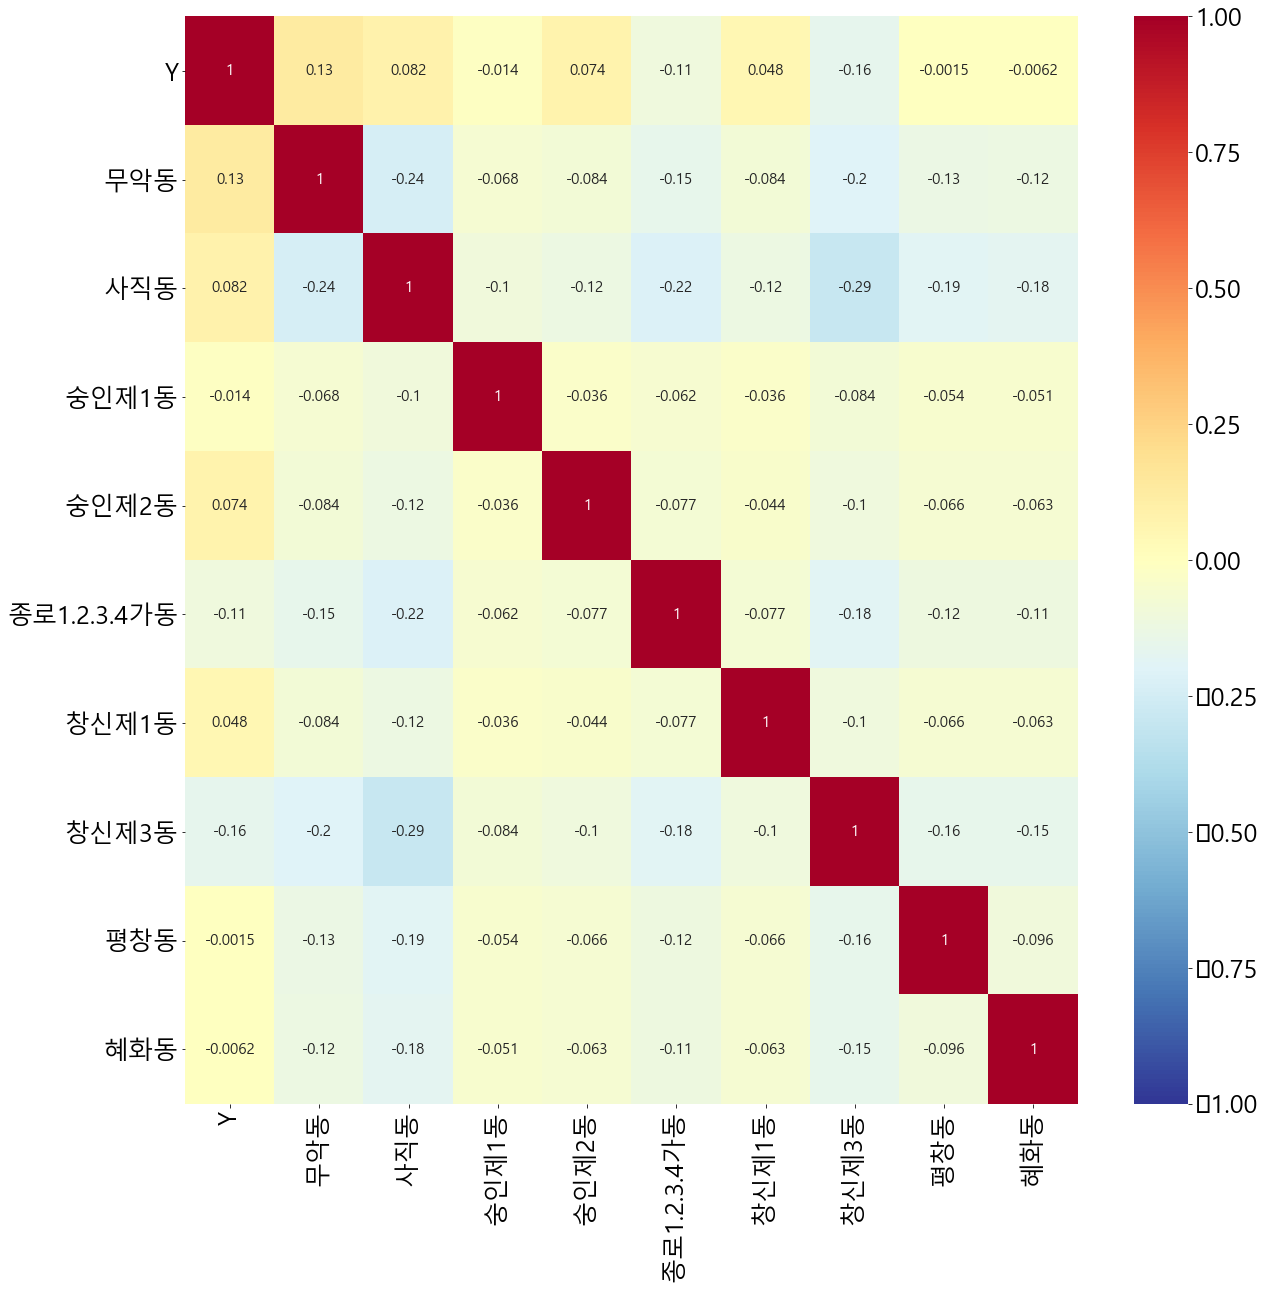

In [13]:
plt.figure(figsize=(20,20))
df = data_new_dong.corr()
sns.heatmap(df,annot = True,cmap = 'RdYlBu_r', vmin = -1, vmax = 1,annot_kws={"size": 15})


In [14]:
ypred=lgbm.predict(x)
ypred_prob= pd.DataFrame([ypred]).transpose()
result=pd.merge(data,ypred_prob,how="outer",left_index=True, right_index=True)


In [15]:
result.to_csv('result1_predict.csv')